In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [166]:
# warning 숨기기
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

----
# Data Analysis - 03
### ML 1st Try

In [167]:
df = pd.read_csv("../Data/03.통합.csv", index_col='년도')
df

,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
년도,,,,,,,,,
2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5
2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2
2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3
2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5
2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7
...,...,...,...,...,...,...,...,...,...
2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5
2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4
2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2


In [168]:
# 총인구 컬럼 제거
df.drop(columns='총인구', inplace=True)
df.head()

,시도,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
년도,,,,,,,,
2013,경기도,1821303,112129,286,739619,49143,248468.3,13718.5
2013,서울특별시,1620640,84066,395,469392,48097,462443.1,532689.2
2013,경상남도,423864,29504,65,190166,12612,57288.6,6703.3
2013,부산광역시,496161,25831,82,160821,13902,77411.6,59554.5
2013,대구광역시,363224,19340,86,136309,9981,46578.5,37541.7


### k값 찾기

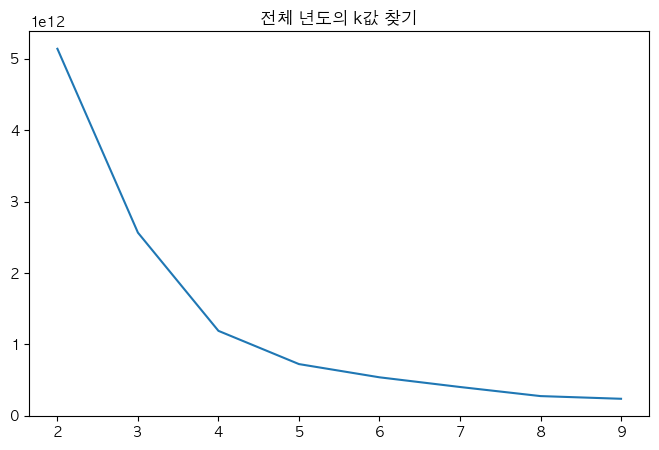

In [169]:
df_temp = df.copy()
df_temp.set_index('시도', inplace=True)
# df_km = df_temp[df_temp.columns.difference(['총인구'])] # 총인구 컬럼이 존재할 때 사용한 것임
df_km = df_temp
# k값 찾기 --------------------------------------------
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_km)
    scores.append(km.inertia_)
# 그래프 그리기 ------------------
plt.figure(figsize=(8,5))
plt.plot(range(2,10), scores)
plt.title('전체 년도의 k값 찾기')
plt.show()
# -----------------------------

> #### 후보: 3, 4, 5

----
### k값 적용(k=4) -> 데이터프레임 컬럼 추가

In [170]:
data_points = df_km.values
km = KMeans(n_clusters=4).fit(data_points) # n_clusters 에 값을 정해주기!

# labels
print(km.labels_)
# 각 군집의 중심위치
km.cluster_centers_

[0 2 3 3 3 3 1 3 1 1 1 1 1 1 1 1 1 0 2 3 3 3 3 1 3 1 1 1 1 1 1 1 1 1 0 2 3
 3 3 3 1 3 1 1 1 1 1 1 1 1 1 0 2 3 3 3 3 1 3 1 1 1 1 1 1 1 1 1 0 2 3 3 3 3
 1 3 1 1 1 1 1 1 1 1 1 0 2 3 3 3 3 1 3 1 1 1 1 1 1 1 1 1 0 2 3 3 3 3 1 3 1
 1 1 1 1 1 1 1 1 0 2 3 3 3 3 1 3 1 1 1 1 1 1 1 1 1]


array([[1.85165600e+06, 9.83292500e+04, 2.71375000e+02, 7.43822500e+05,
        5.25488750e+04, 3.22522750e+05, 2.05947125e+04],
       [1.95049262e+05, 1.01237875e+04, 3.37125000e+01, 7.75759125e+04,
        5.29692500e+03, 2.30497900e+04, 3.85136163e+04],
       [1.61312862e+06, 6.88623750e+04, 3.90250000e+02, 4.37333375e+05,
        4.58475000e+04, 5.71485213e+05, 6.76193713e+05],
       [4.03589850e+05, 2.07180750e+04, 6.76250000e+01, 1.51779725e+05,
        1.13792750e+04, 7.19181200e+04, 4.38354200e+04]])

In [171]:
# 데이터가 어느 군집에 소속되어 있는지 정하기
df_km['cluster_id'] = km.labels_
df_km

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
시도,,,,,,,,
경기도,1821303,112129,286,739619,49143,248468.3,13718.5,0
서울특별시,1620640,84066,395,469392,48097,462443.1,532689.2,2
경상남도,423864,29504,65,190166,12612,57288.6,6703.3,3
부산광역시,496161,25831,82,160821,13902,77411.6,59554.5,3
대구광역시,363224,19340,86,136309,9981,46578.5,37541.7,3
...,...,...,...,...,...,...,...,...
충청북도,226441,8607,40,85135,6103,28669.1,27669.5,1
대전광역시,243418,7481,44,79807,6405,39341.3,38725.4,1
강원도,217897,7835,32,73478,5554,22831.4,23634.2,1


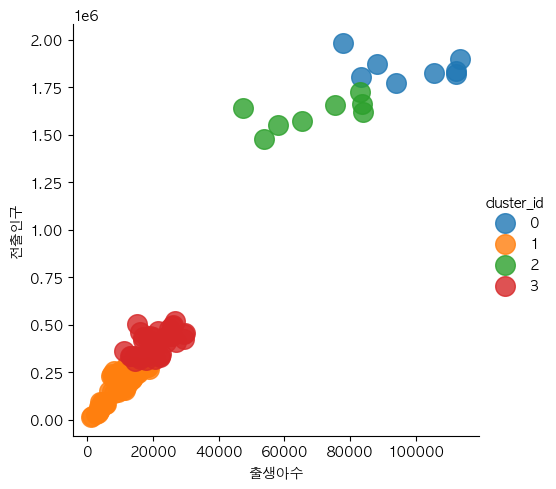

In [172]:
sns.lmplot(x='출생아수', y='전출인구',
            data=df_km, fit_reg=False,
            scatter_kws={'s':200},
            hue="cluster_id"
)
plt.show()

----
# Classification

### Feature, Target

In [173]:
# Feature, Target
data = df_km[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액', '예금액']].to_numpy()
target = df_km['cluster_id'].to_numpy()

----
### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [174]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2, stratify=target) # random_state=42

In [175]:
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, stratify=train_target) # random_state=42

In [176]:
# 세트 별 크기
print("Train :", sub_input.shape)
print("Valid :", val_input.shape)
print("Test  :", test_input.shape)

Train : (86, 7)
Valid : (22, 7)
Test  : (28, 7)


----
### Decision Model

In [177]:
# 모델 tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()  # random_state=42
dt.fit(sub_input, sub_target)

print("Train score :", dt.score(sub_input, sub_target))
print("Valid score :", dt.score(val_input, val_target))

Train score : 1.0
Valid score : 0.9545454545454546


In [178]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
scores

{'fit_time': array([0.00073981, 0.00046682, 0.00039816, 0.00031996, 0.00032496]),
 'score_time': array([0.00040483, 0.0002811 , 0.00019503, 0.00017881, 0.00017095]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [179]:
# 교차검증 후의 정확도 판단
import numpy as np
np.mean(scores['test_score'])

1.0

In [180]:
dt.predict(train_input)

array([0, 1, 1, 1, 3, 3, 3, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 0, 1, 1, 2, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3,
       0, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1,
       3, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 1, 0, 1, 2],
      dtype=int32)

----
### Random Forest

In [181]:
# RandomForest
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1) # default:100 # random_state=42
rf.fit(sub_input, sub_target)

print("Train score :", rf.score(sub_input, sub_target))
print("Valid score :", rf.score(val_input, val_target))

Train score : 1.0
Valid score : 1.0


In [182]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(rf, train_input, train_target)
scores

{'fit_time': array([0.04317784, 0.03798604, 0.03801394, 0.0378592 , 0.04014325]),
 'score_time': array([0.00655007, 0.00646925, 0.00697088, 0.00694203, 0.00744295]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [183]:
# 교차검증 후의 정확도 판단
import numpy as np
np.mean(scores['test_score'])

1.0

In [184]:
rf.predict(test_input)

array([1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 0, 1, 1, 0, 1, 3, 1, 1, 1,
       1, 2, 3, 1, 3, 3], dtype=int32)

> ## Classfication 정확도가 높으므로 Regression으로 시도해보자

In [ ]:
# # KNN
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(n_neighbors=3)
# clf.fit(train_input, train_target)
# clf.score(test_input, test_target)

----
----
# Regression
1. cluster_id : [0, 1, 2, 3] -> [0 ~ 1] 변환
2. Regression 진행

### cluster_id : [0, 1, 2, 3] -> [0 ~ 1] 변환

In [185]:
df_km['cluster_id'] = df_km['cluster_id'] + 10
df_km_temp = df_km.sort_values(by='전출인구', ascending=True)
temp_list = df_km_temp['cluster_id'].unique()

i = 3
for temp in temp_list:
    df_km['cluster_id'][df_km['cluster_id'] == temp] = i
    i-=1
df_km['cluster_id'] = np.round(df_km['cluster_id'] / 3, 2)
df_km['cluster_id'].unique()

array([0.  , 0.33, 0.67, 1.  ])

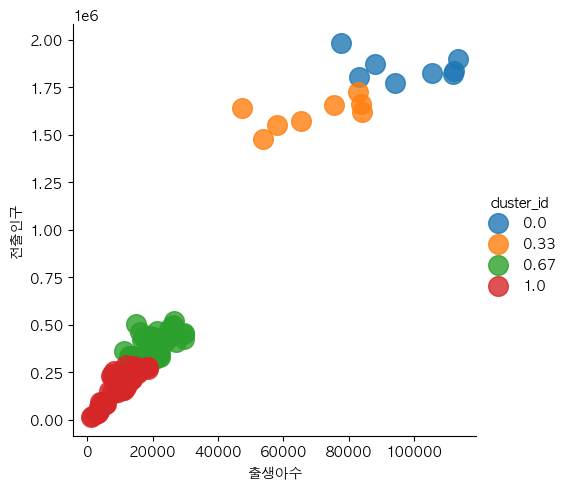

In [186]:
sns.lmplot(x='출생아수', y='전출인구',
            data=df_km, fit_reg=False,
            scatter_kws={'s':200},
            hue="cluster_id"
)
plt.show()

In [187]:
# Feature, Target
data = df_km[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액', '예금액']].to_numpy()
target = df_km['cluster_id'].to_numpy()

----
### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [188]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target

In [189]:
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, stratify=train_target) # random_state=42

In [190]:
# 세트 별 크기
print("Train :", sub_input.shape)
print("Valid :", val_input.shape)
print("Test  :", test_input.shape)

Train : (86, 7)
Valid : (22, 7)
Test  : (28, 7)


----
### Decision Model

In [191]:
# 모델 tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()  # random_state=42
dt.fit(sub_input, sub_target)

print("Train score :", dt.score(sub_input, sub_target))
print("Valid score :", dt.score(val_input, val_target))

Train score : 1.0
Valid score : 1.0


In [192]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
scores

{'fit_time': array([0.00137115, 0.00087714, 0.00036788, 0.00030088, 0.00050712]),
 'score_time': array([0.00027394, 0.00030494, 0.00016189, 0.00016284, 0.00018001]),
 'test_score': array([0.94774244, 0.95286688, 1.        , 1.        , 1.        ])}

In [193]:
# 교차검증 후의 정확도 판단
import numpy as np
np.mean(scores['test_score'])

0.9801218646387161

In [194]:
dt.predict(train_input)

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.67, 0.67, 1.  , 0.67, 1.  , 0.67,
       1.  , 0.67, 0.67, 1.  , 0.67, 1.  , 0.33, 0.  , 0.  , 1.  , 1.  ,
       1.  , 1.  , 0.  , 1.  , 0.67, 1.  , 0.  , 1.  , 1.  , 1.  , 0.33,
       1.  , 0.67, 1.  , 1.  , 0.67, 0.67, 1.  , 0.33, 1.  , 1.  , 0.67,
       1.  , 1.  , 0.67, 0.67, 0.67, 0.67, 1.  , 0.33, 1.  , 1.  , 0.67,
       1.  , 0.33, 0.67, 1.  , 1.  , 0.67, 1.  , 1.  , 1.  , 1.  , 0.67,
       1.  , 1.  , 1.  , 0.67, 0.67, 1.  , 1.  , 1.  , 0.67, 0.  , 1.  ,
       0.67, 1.  , 1.  , 1.  , 0.67, 1.  , 0.67, 0.67, 0.67, 1.  , 0.67,
       1.  , 0.33, 0.67, 1.  , 1.  , 1.  , 0.67, 0.67, 0.67, 1.  , 0.67,
       0.67, 1.  , 1.  , 0.67, 1.  , 1.  , 1.  , 0.  , 0.67])

----
### Random Forest

In [195]:
# RandomForest
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1) # default:100 # random_state=42
rf.fit(sub_input, sub_target)

print("Train score :", rf.score(sub_input, sub_target))
print("Valid score :", rf.score(val_input, val_target))

Train score : 0.9990279478260747
Valid score : 0.9982068083323835


In [196]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(rf, train_input, train_target)
scores

{'fit_time': array([0.04407716, 0.03859782, 0.03933501, 0.03601933, 0.03644705]),
 'score_time': array([0.00625896, 0.00579906, 0.00585699, 0.00518894, 0.00509214]),
 'test_score': array([0.99352798, 0.99119082, 0.99060723, 0.99356399, 0.99740895])}

In [197]:
# 교차검증 후의 정확도 판단
import numpy as np
np.mean(scores['test_score'])

0.9932597929507022

In [198]:
rf.predict(test_input)

array([0.0066, 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 0.9538,
       1.    , 1.    , 0.9934, 1.    , 1.    , 1.    , 0.2871, 0.67  ,
       1.    , 0.67  , 1.    , 1.    , 0.9967, 0.9967, 0.3236, 1.    ,
       1.    , 0.    , 1.    , 0.67  ])

In [199]:
test_input

array([[1.871621e+06, 8.817500e+04, 2.680000e+02, 7.524990e+05,
        4.936400e+04, 3.505536e+05, 2.368040e+04],
       [1.522280e+05, 7.539000e+03, 3.300000e+01, 6.851200e+04,
        3.486000e+03, 2.849510e+04, 1.664630e+04],
       [2.088310e+05, 9.333000e+03, 4.000000e+01, 8.670900e+04,
        5.918000e+03, 2.639990e+04, 2.555550e+04],
       [9.219300e+04, 5.494000e+03, 2.100000e+01, 3.827200e+04,
        2.886000e+03, 1.254820e+04, 5.708100e+03],
       [1.510900e+04, 1.111000e+03, 2.000000e+00, 7.090000e+03,
        4.260000e+02, 2.429100e+03, 1.441735e+05],
       [2.262840e+05, 1.066200e+04, 3.200000e+01, 8.045800e+04,
        5.432000e+03, 1.418470e+04, 1.512430e+04],
       [2.483970e+05, 1.396200e+04, 5.000000e+01, 9.159900e+04,
        7.085000e+03, 2.580470e+04, 2.569250e+04],
       [2.769000e+05, 1.423100e+04, 5.400000e+01, 1.018600e+05,
        7.545000e+03, 2.462590e+04, 1.730330e+04],
       [2.526070e+05, 1.269800e+04, 5.200000e+01, 9.789500e+04,
        7.233000

In [200]:
rf.predict([[3.131880e+05, 6.773700e+04, 2.650000e+02, 7.617310e+05,
       6.314500e+04, 4.198318e+05, 2.493950e+04]])

array([0.1563])

In [201]:
# # RandomForest
# from sklearn.model_selection import cross_validate
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_jobs=-1, random_state=42) # default:100
# scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1) # 크로스밸리데이션 쓰려면 모델부터 만들어놔야한다 # return_train_score=True > 그래야 점수를 알 수 있다.
# print(np.mean(scores['train_score']), np.mean(scores['test_score']))

----
----
### KFold를 이용한 방법

In [202]:
# from sklearn.model_selection import StratifiedKFold
# splitter = StratifiedKFold() # default : 5
# scores = cross_validate(dt, train_input, train_target, cv=splitter)
# scores

In [203]:
# np.mean(scores['test_score'])

In [204]:
# # KFold의 Fold 중 10개로 나누어서 교차검증
# splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # default : 5
# scores = cross_validate(dt, train_input, train_target, cv=splitter)
# scores

In [205]:
# np.mean(scores['test_score'])

> 0.963 (n_splits=10)